In [35]:
# sns 한글 폰트 깨질 경우 사용! 
#_*_coding: utf-8 _*_

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fm.get_fontconfig_fonts()

# 로컬 폰트 경로 ******
font_location = 'C:\\Users\\kas71\\OneDrive - 성균관대학교\\문서\\KollusPlayer3\\down\\html5player\\css\\font\\NanumBarunGothicBold.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

plt.rc("font", family = "Malgun Gothic")

sns.set(font = "Malgun Gothic",
       rc ={"axes.unicode_minus":False},
       style = "darkgrid")

In [36]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,Conv1D,MaxPooling1D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
import tensorflow.keras as keras
from keras import regularizers
from keras import backend as K
from keras.utils import to_categorical
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [49]:
#데이터 가져오기 
filename = 'C:\\Users\\kas71\\jupyter\\DACON\\train.csv'

train = pd.read_csv(filename, encoding='utf-8'  ,parse_dates =['date_time'], skiprows=0)

train.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0,0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0,0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0,0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0,0


In [50]:
train.columns = ['num','date_time','전력량','기온','풍속','습도','강수량','일조','비전기냉방설비운영','태양광보유']

In [51]:
# train 데이터 결측치 확인
pd.isnull(train).sum()

num          0
date_time    0
전력량          0
기온           0
풍속           0
습도           0
강수량          0
일조           0
비전기냉방설비운영    0
태양광보유        0
dtype: int64

- train 데이터의 경우 결측치가 없다는 것으로 판단

# 표 > 동준님 코드 인용

<AxesSubplot:xlabel='전력량', ylabel='Count'>

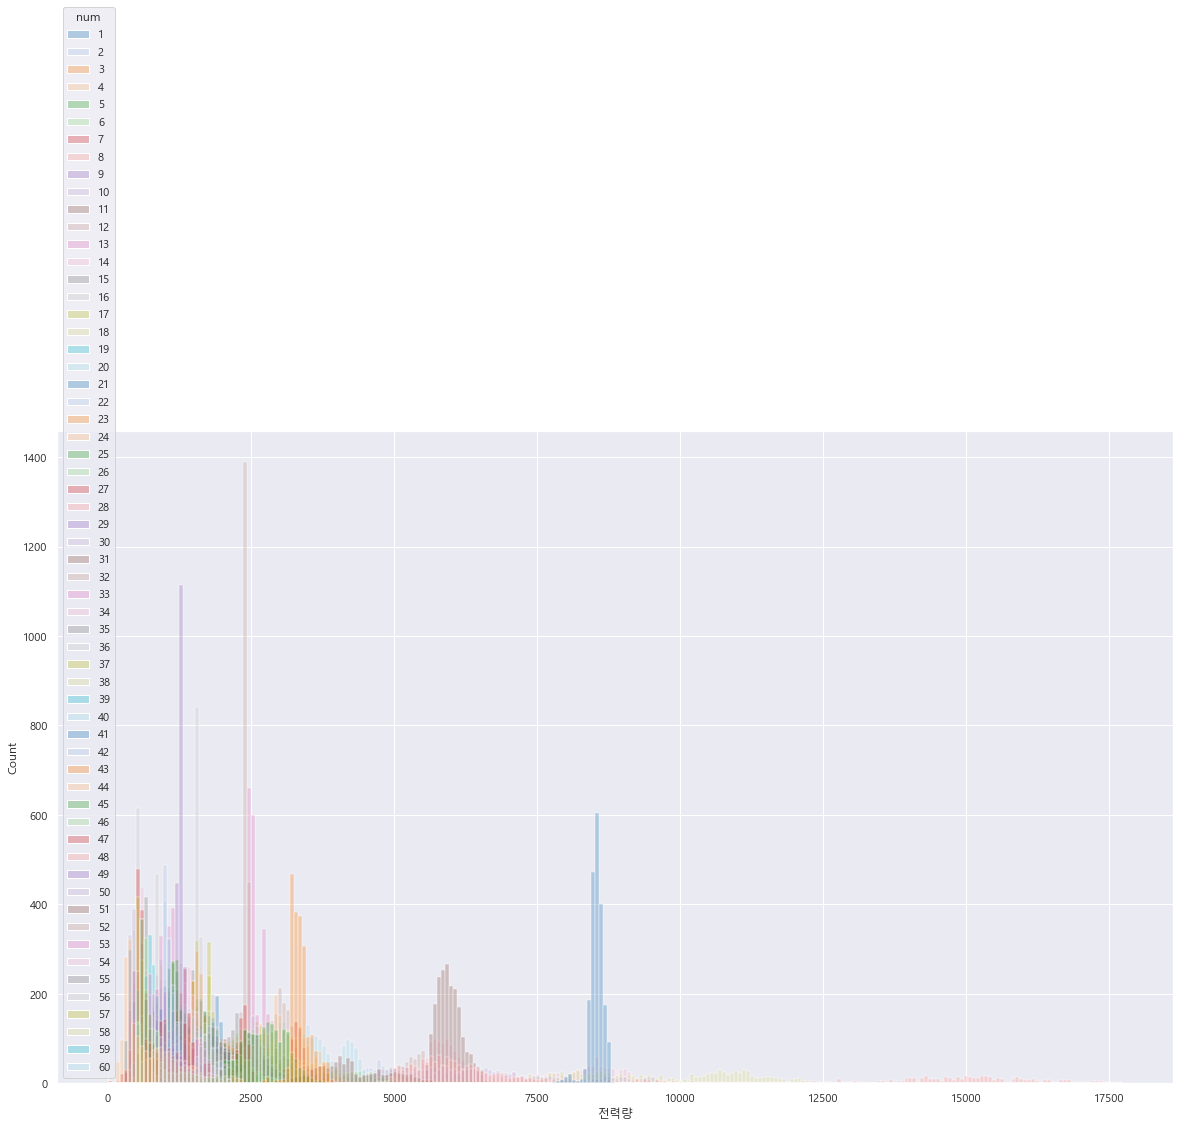

In [53]:
fig = plt.figure(figsize = (20, 12))
sns.histplot(data=train, x='전력량', hue = 'num', alpha = 0.3, palette = 'tab20')

- < 각 number 마다 데이터의 추세 확인.>

사전 연구 결과 각각의 빌딩마다 데이터의 추세가 다르다는 것을 확인 하였음

In [54]:
#---- weekend 주말일 경우 1 아닐경우 0 
#---- weekday 0 = 월, 1 = 화, 2 = 수 ,3 = 목 ~~~~
# 8월 24일까지 있음  2020,6월 부터  2020.8월까지 평일 공휴일이 없음 있다면 따로 주말 지정!

# 월 일 시간 평일 주말 구분 
train['month'] = train['date_time'].dt.month
train['day'] = train['date_time'].dt.day
train['hour'] = train['date_time'].dt.hour
train['weekday'] = train['date_time'].dt.weekday
train['weekend'] = train['weekday'].isin([5,6]).astype(int)

In [55]:
# 각 변수 생성 및 변수에 맞는 데이터 입력 사용하기 쉽게 num 마다 저장
for i in range(1,61):
    inp = train[train['num'] == i]
    globals()['train_num{}'.format(i)] = inp

print(train_num60)
#길이는 2040 

        num           date_time       전력량    기온   풍속    습도  강수량   일조  \
120360   60 2020-06-01 00:00:00  2528.496  17.1  2.6  94.0  0.1  0.0   
120361   60 2020-06-01 01:00:00  2243.808  17.0  5.7  94.0  0.0  0.0   
120362   60 2020-06-01 02:00:00  2284.848  16.4  5.4  95.0  0.0  0.0   
120363   60 2020-06-01 03:00:00  2248.992  16.4  3.9  96.0  0.0  0.0   
120364   60 2020-06-01 04:00:00  2377.728  16.3  5.3  96.0  0.0  0.0   
...     ...                 ...       ...   ...  ...   ...  ...  ...   
122395   60 2020-08-24 19:00:00  4114.368  27.8  2.3  68.0  0.0  0.7   
122396   60 2020-08-24 20:00:00  3975.696  27.3  1.2  71.0  0.0  0.0   
122397   60 2020-08-24 21:00:00  3572.208  27.3  1.8  71.0  0.0  0.0   
122398   60 2020-08-24 22:00:00  3299.184  27.1  1.8  74.0  0.0  0.0   
122399   60 2020-08-24 23:00:00  3204.576  27.1  2.6  75.0  0.0  0.0   

        비전기냉방설비운영  태양광보유  month  day  hour  weekday  weekend  
120360          1      1      6    1     0        0        0  
120361   

In [56]:
#건물 별 전력사용량 대비 변수 변수들의 상관관계 확인 check
train_num1.corr()['전력량']
# train_num20.corr()['전력사용량(kWh)']
# train_num51.corr()['전력사용량(kWh)']

num               NaN
전력량          1.000000
기온           0.637313
풍속           0.057756
습도          -0.007981
강수량          0.001241
일조           0.064190
비전기냉방설비운영         NaN
태양광보유             NaN
month        0.376055
day          0.140629
hour         0.261628
weekday      0.026035
weekend     -0.037649
Name: 전력량, dtype: float64

- 1차 상관관계 분석 결과 
1. 전력사용량과 상관관계가 높은 것은 기온으로 판단 더 자세한 상관관계 확인을 위해 1차 회귀분석후 결과도출 결과에 따라서 모델링 진행해야함 

2. 기온과 전력사용량은 양의 상관관계를 가짐 기온이 올라갈 수록 전력사용량 증가 그리고 비전기냉방설비운영과 태영광보유는 상관관계가 없으므로 드롭 하는것이 좋아보임 

3. 건물마다 차이가 있지만 대부분의 건물에서 같은 결과를 보여줌 2등 3등의 경우 풍속 및 습도로 판단

<u>기온이 높다는 것은 에어컨이 많은 영향을 준다는 것으로 생각해볼 수 있다. 또한 이때가 여름인 점을 고려해 더욱 가능성이 높다 판단 하였음</u>

In [75]:
train['기온']

0         17.6
1         17.7
2         17.5
3         17.1
4         17.0
          ... 
122395    27.8
122396    27.3
122397    27.3
122398    27.1
122399    27.1
Name: 기온, Length: 122400, dtype: float64

In [76]:
from statsmodels.formula.api import ols
res = ols(formula = '전력량 ~ 기온 + 풍속 + 습도+ 강수량 + 일조 ', data = train)
result = res.fit()
result.summary()

#이전 상관관계 분석시 상관없는 두가지를 제거하고 진행 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    전력량   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     851.9
Date:                Tue, 15 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:10:59   Log-Likelihood:            -1.1055e+06
No. Observations:              122400   AIC:                         2.211e+06
Df Residuals:                  122394   BIC:                         2.211e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -298.5775     73.210     -4.078      0.000    -442.068    -155.087
기온            81.6575      2.074     39.378      0.000      77.593      85.722
풍속           113.2143      3.911     28.946      0.000     105.548     120.880
습도             4.2588      0.506      8.416      0.000       3.267       5.251
강수량           -1.1311      2.268     -0.499      0.618      -5.576       3.314
일조           274.5624     21.042     13.048      0.000     233.320     315.804
==============================================================================
Omnibus:                    67769.733   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           565621.462
Skew:                           2.586   Prob(JB):                         0.00
Kurtosis:                      12.174   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(res.exog, i)} 
             for i, column in enumerate(res.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,기온,1.491957
1,풍속,1.048216
2,습도,1.843940
3,강수량,1.058481
4,일조,1.815916


# 회귀분석 결과 

강수량의 경우 p value가 0.05 이상으로 유의미한 영향을 미치지 않는 것으로 판단 강수량을 제거하는 것이 모델의 성능을 높일 수 있다고 할 수 있다.

그러나 각 변수들의 다중공선성을 파악하였을때 모두 1과 가깝고 10을 넘기지 않음으로 문제되지 않음

but. R2 값을 보았을때 설명력이 3.4%로 높지 않음, 회귀모형은 적합하지 않다는 결과를 나타내었다. 
 

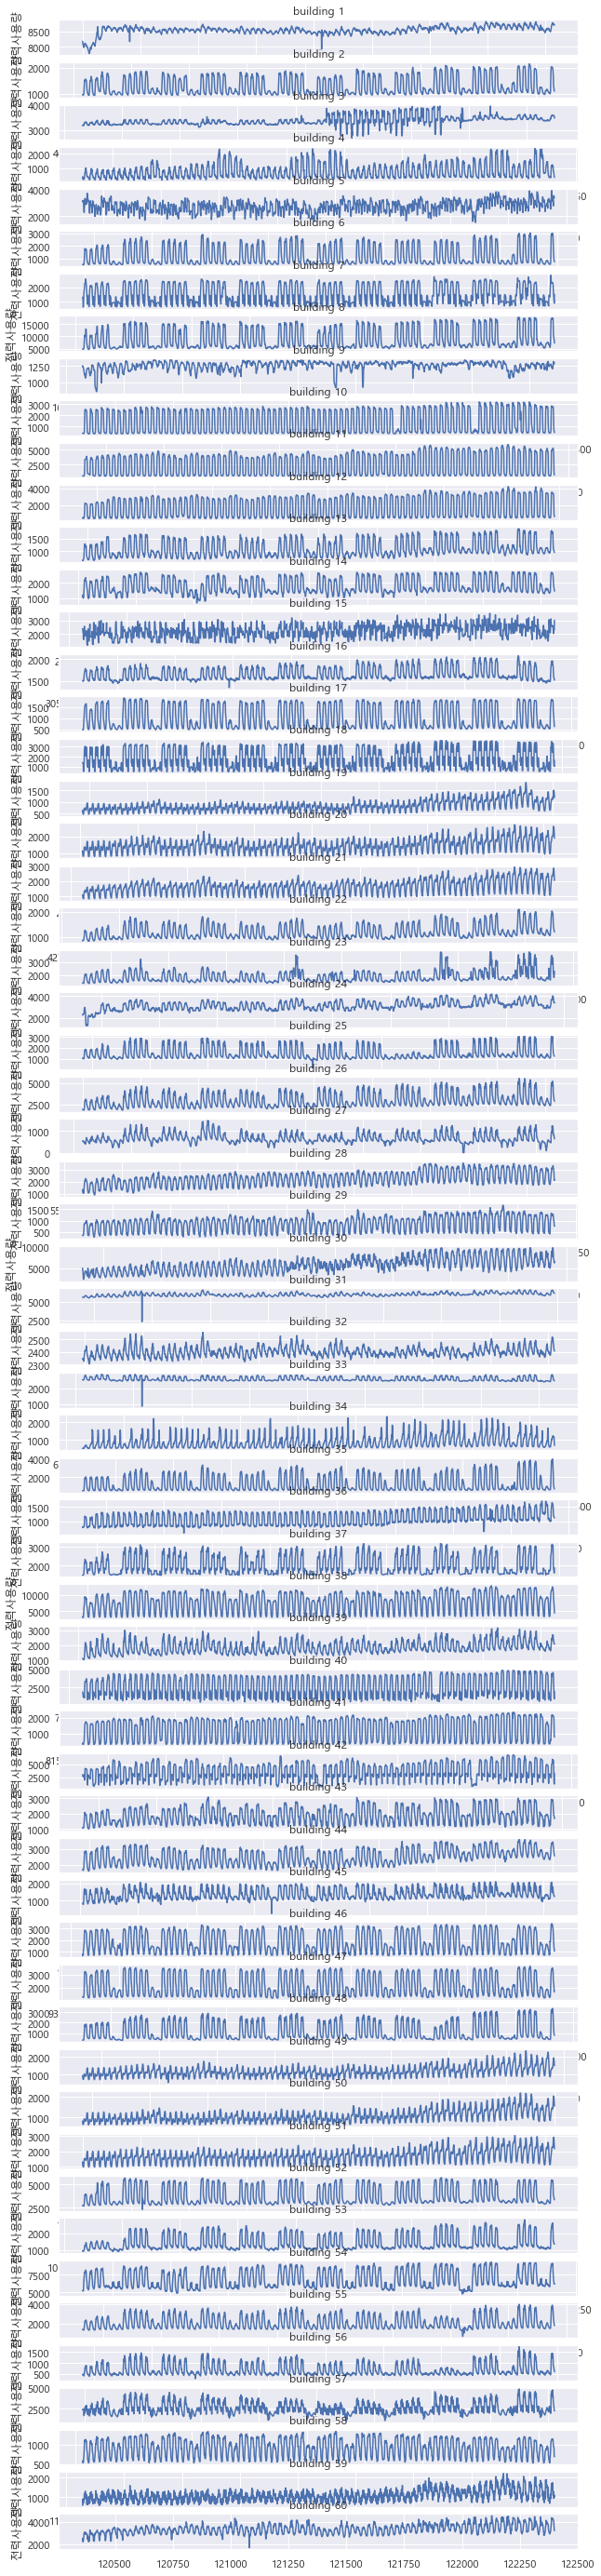

In [59]:
# 각 데이터 군집 전 시계열 특성 확인 
fig = plt.figure(figsize = (10, 50))
for i in range(1,61):
    a = train[train['num'] == i]
    aa = a['전력량']
    plt.subplot(60,1,i)
    plt.plot(aa)
    plt.title(f'building {i}')
    plt.xlabel('')
    plt.ylabel('전력사용량')


각 빌딩별 특성이 보임 빌딩 6 7 8 같은 경우 비슷한 특성을 가지고 10 11 12 도 비슷한 특성을 가짐 20 21 22 도 비슷함 1 , 31 ,33도 비슷한 특성을 가짐 

- 4개의 군집 혹은 5개의 군집으로 분류 가능 예상 